### We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline
print('Done installing all the module needed for this project:')

Done installing all the module needed for this project:


### Lets download the dataset

In [6]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2021-01-01 07:20:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2021-01-01 07:20:05 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data from the CSV file using pandas, to create Dataframe.

In [13]:
df=pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### lets print the dimension of the loaded dataset.

In [10]:
df.shape

(346, 10)

In [15]:
df['due_date']

0       10/7/2016
1       10/7/2016
2       9/22/2016
3       10/8/2016
4       10/8/2016
          ...    
341     9/25/2016
342    10/10/2016
343     9/26/2016
344    11/10/2016
345    10/11/2016
Name: due_date, Length: 346, dtype: object

### Converting to Date Time Object.

In [16]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data Visualisation And PreProcessing.

### Checking the unique value counts of loan_status.

In [25]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

#### It seems that 260 individual have already paid off the loan, but 86 individual have gone to collection.

In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [27]:
import seaborn as sns
print('Seaborn library  imported sucessfully;')

Seaborn library  imported sucessfully;


### Linspace in python create a range of number accroding to user input, where the difference between the numbers are same.

In [29]:
bins=np.linspace(df.Principal.min(),df.Principal.max(),10)
bins

array([ 300.        ,  377.77777778,  455.55555556,  533.33333333,
        611.11111111,  688.88888889,  766.66666667,  844.44444444,
        922.22222222, 1000.        ])

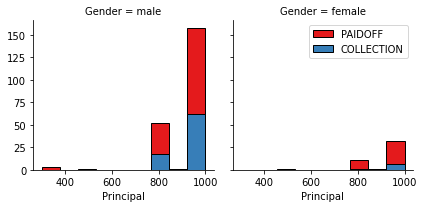

In [48]:
bins=np.linspace(df.Principal.min(),df.Principal.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
g.map(plt.hist,'Principal',bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

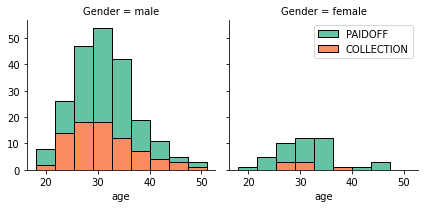

In [57]:
bins=np.linspace(df.age.min(),df.age.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set2',col_wrap=2)
g.map(plt.hist,'age',bins=bins,ec='k')
g.axes[-1].legend()
plt.show()